# **Cereal production forecasting platform in Burkina Faso**

**SECOND PART : Exploratory Data Analysis (EDA)**

In [1]:
# Importation des bibliothèques
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr
import folium
from IPython.display import display
from ipywidgets import interact


In [2]:
#Import the database
from google.colab import files
uploaded = files.upload()

Saving base_finale_céréales.xlsx to base_finale_céréales.xlsx


In [3]:
# Load data
df = pd.read_excel("base_finale_céréales.xlsx")

In [4]:
# Data overview
print("Aperçu des données :")
print(df.head())
print("\nInfos sur les types de données :")
print(df.info())
print("\nValeurs manquantes :")
print(df.isnull().sum())

Aperçu des données :
              Région  Céréales  Année  Production (en tonnes)  \
0  Boucle du Mouhoun  Arachide   1996                 14810.0   
1  Boucle du Mouhoun  Arachide   1997                 22231.0   
2  Boucle du Mouhoun  Arachide   1998                 15490.0   
3  Boucle du Mouhoun  Arachide   1999                 17127.0   
4  Boucle du Mouhoun  Arachide   2000                 21565.0   

   Superficie (en ha) Rendement (tonne/ha)  \
0             37458.0                0.395   
1             21702.0                1.024   
2             30410.0                0.509   
3             21862.0                0.783   
4             26072.0                0.827   

   Précipitations moyennes annuelles (en mm)  Nombre de jours de pluie   \
0                                      676.0                       66.0   
1                                      837.9                       67.0   
2                                      945.3                       75.0   
3          

In [5]:
# Descriptives statistics
print("\nStatistiques descriptives :")
print(df.describe())


Statistiques descriptives :
             Année  Production (en tonnes)  Superficie (en ha)  \
count  2457.000000             2457.000000         2457.000000   
mean   2009.000000            54874.184341        49685.875056   
std       7.790466            71988.114972        66738.886633   
min    1996.000000                0.000000            0.000000   
25%    2002.000000             9897.000000         5152.000000   
50%    2009.000000            28845.000000        22263.000000   
75%    2016.000000            70594.000000        69171.000000   
max    2022.000000           620019.703626       373407.000000   

       Précipitations moyennes annuelles (en mm)  Nombre de jours de pluie   \
count                                2457.000000                2457.000000   
mean                                  866.753515                  69.161274   
std                                   198.908438                  16.661947   
min                                   310.700000            

In [9]:
fig = px.scatter(
    df,
    x="Températures moyennes annuelles (en C°)",
    y="Production (en tonnes)",
    color="Céréales",
    title="Relation entre Température et production",
    labels={
        "Température": "Températures moyennes annuelles (en C°)",
        "Production": "Production (en tonnes)",
        "Céréales": "Céréales"
    },
    hover_data={
        'Céréales': True,
        'Températures moyennes annuelles (en C°)': ':.2f',
        'Production (en tonnes)': ':.2f'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Personnalisation
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    plot_bgcolor='white',
    hovermode='closest',
    legend=dict(
        title='Type of cereal',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.update_traces(
    marker=dict(size=10, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')),
    hovertemplate="<br>".join([
        "<b>%{customdata[0]}</b>",
        "Température: %{x} mm",
        "Production: %{y} t/ha",
        "<extra></extra>"
    ])
)

fig.show()

In [12]:
fig = px.scatter(
    df,
    x="Précipitations moyennes annuelles (en mm)",
    y="Production (en tonnes)",
    color="Céréales",
    title="Relation entre précipitations et production",
    labels={
        "Précipitation": "Précipitations moyennes annuelles (en mm)",
        "Production": "Production (en tonnes)",
        "Céréales": "Céréales"
    },
    hover_data={
        'Céréales': True,
        'Précipitations moyennes annuelles (en mm)': ':.2f',
        'Production (en tonnes)': ':.2f'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Personnalisation
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    plot_bgcolor='white',
    hovermode='closest',
    legend=dict(
        title='Type of cereal',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# Formatage des tooltips
fig.update_traces(
    marker=dict(size=10, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')),
    hovertemplate="<br>".join([
        "<b>%{customdata[0]}</b>",
        "Précipitations: %{x} mm",
        "Rendement: %{y} t/ha",
        "<extra></extra>"
    ])
)

fig.show()

In [13]:
fig = px.scatter(
    df,
    x="Nombre de jours de pluie ",
    y="Production (en tonnes)",
    color="Céréales",
    title="Relation entre nbre de jours de pluie et production",
    labels={
        "Nombre de jours de pluie ": "Le nombre de jours de pluie",
        "Production": "Production (en tonnes)",
        "Céréales": "Céréales"
    },
    hover_data={
        'Céréales': True,
        'Nombre de jours de pluie ': ':.2f',
        'Production (en tonnes)': ':.2f'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Personnalisation
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    plot_bgcolor='white',
    hovermode='closest',
    legend=dict(
        title='Type de céréale',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

#
fig.update_traces(
    marker=dict(size=10, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')),
    hovertemplate="<br>".join([
        "<b>%{customdata[0]}</b>",
        "Nombre_Jour_Pluie: %{x} nb",
        "Rendement: %{y} t/ha",
        "<extra></extra>"
    ])
)

fig.show()


Distribution of variables :


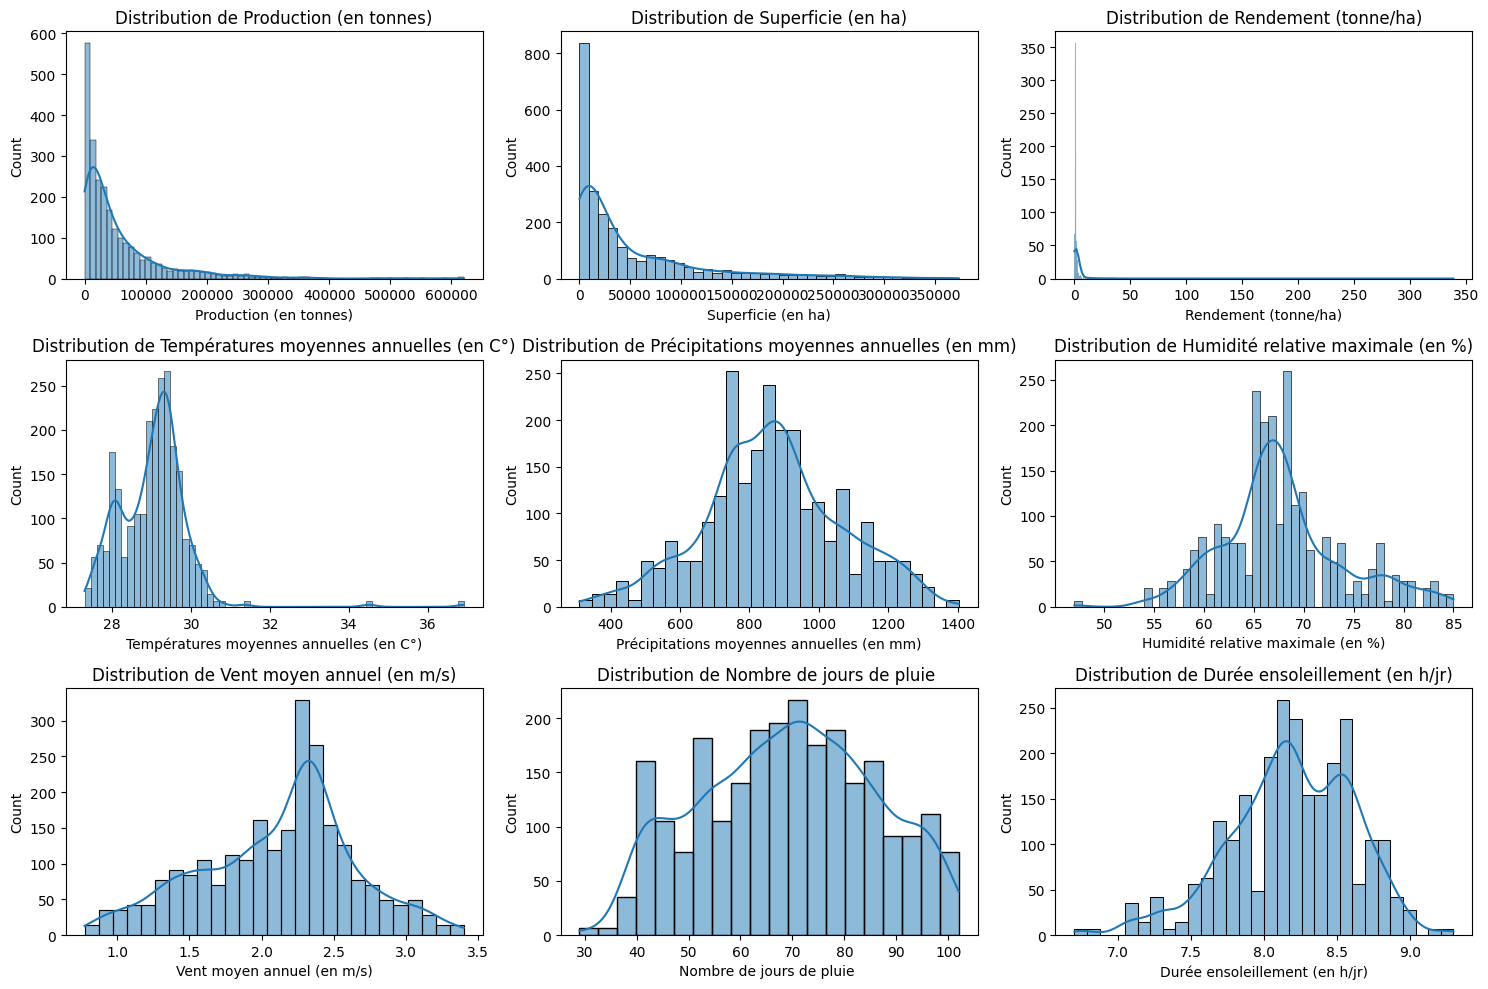

In [19]:
num_vars = ['Production (en tonnes)',"Superficie (en ha)", "Rendement (tonne/ha)", "Températures moyennes annuelles (en C°)", "Précipitations moyennes annuelles (en mm)",
                    "Humidité relative maximale (en %)", "Vent moyen annuel (en m/s)", "Nombre de jours de pluie ", "Durée ensoleillement (en h/jr)"]

for var in num_vars:
    df[var] = pd.to_numeric(df[var], errors='coerce')
print("\nDistribution of variables :")

plt.figure(figsize=(15,10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution de {var}')
plt.tight_layout()
plt.show()

In [20]:
rendement_region = df.groupby('Région')['Rendement (tonne/ha)'].sum().reset_index()

fig = px.bar(rendement_region,
             x='Région',
             y='Rendement (tonne/ha)',
             color='Région',
             title='Rendement par région',
             labels={'Rendement (tonne/ha)': 'Rendement', 'Région': 'Région'},
             hover_data=['Rendement (tonne/ha)'],
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

In [21]:
production_region = df.groupby('Région')['Production (en tonnes)'].sum().reset_index().sort_values(by='Production (en tonnes)', ascending=False)

fig = px.bar(production_region,
             x='Région',
             y='Production (en tonnes)',
             color='Région',
             title='Production totale par région',
             labels={'Production (en tonnes)': 'Production totale', 'Région': 'Région'},
             hover_data=['Production (en tonnes)'],
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.show()

In [22]:
production_region_cereal = df.groupby(['Région', 'Céréales'])['Production (en tonnes)'].sum().reset_index()

fig = px.bar(production_region_cereal,
             x='Région',
             y='Production (en tonnes)',
             color='Céréales',
             barmode='group',
             hover_data=['Céréales', 'Région'],
             labels={'Production (en tonnes)': 'Production totale', 'Céréale': 'Céréales'},
             title='Production by Type of Céréale and Region',
             color_discrete_sequence=px.colors.qualitative.Prism)

fig.show()

In [24]:
production_annee = df.groupby('Année')['Production (en tonnes)'].sum().reset_index()

fig = px.line(production_annee,
             x='Année',
             y='Production (en tonnes)',
             title="Evolution de la production selon les années",
             labels={'Production (en tonnes)': 'Production totale (tonnes)', 'Année': 'Années'},
             hover_data=['Production (en tonnes)'])
fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [26]:
# 3. Seasonal analysis (adapted to annual data)

from ipywidgets import interact

fig = px.line(
    df.groupby(['Année', 'Céréales'])['Production (en tonnes)'].sum().reset_index(),
    x='Année',
    y='Production (en tonnes)',
    color='Céréales',
    markers=True,
    title='Évolution de la production céréalière (1996-2022)',
    labels={'Production (en tonnes)': 'Production (tonnes)', 'Année': 'Années'},
    hover_data={'Céréales': True, 'Année': '|%Y', 'Production (en tonnes)': ':.2f'},
)
fig.show()

In [27]:
rendement_annee = df.groupby('Année')['Rendement (tonne/ha)'].sum().reset_index()

fig = px.line(rendement_annee,
             x='Année',
             y='Rendement (tonne/ha)',
             title="L'évolution du rendement selon les années",
             labels={'Rendement (tonne/ha)': 'Le rendement totale (tonnes/ha)', 'Année': 'Années'},
             hover_data=['Rendement (tonne/ha)'])
fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [29]:
fig = px.line(
    df.groupby(['Année', 'Céréales'])['Rendement (tonne/ha)'].sum().reset_index(),
    x='Année',
    y='Rendement (tonne/ha)',
    color='Céréales',
    markers=True,
    title='Évolution du rendement céréalier (1996-2022)',
    labels={'Rendement (tonne/ha)': 'Le rendement (tonne/ha)', 'Année': 'Années'},
    hover_data={'Céréales': True, 'Année': '|%Y', 'Rendement (tonne/ha)': ':.2f'},
)
fig.show()